# K-pop Idols

* **Data:** `kpop_idols.csv`
* **Description:** K-pop is Korean pop music. It's popular the world over, especially when their fans take over Twitter hashtags. Idols are the individual musicians. Note that this dataset is not necessarily current k-pop idols, but includes people from the past, too (for example: group memberships might not be current).
* **Source:** https://www.kaggle.com/kimjihoo/kpopdb
* **Columns of interest:**
    * These are pretty self-explanatory. Just know "Birthplace" is the city they were born in, while "Country" is the country.

## Read in your data

In [86]:
import pandas as pd

df = pd.read_csv("kpop_idols.csv")
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", '{:,}'.format)

# df.head()

In [87]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

## What is the percentage of male vs female kpop idols?

In [88]:
#This looks at the percentage of male vs female under the gender column
df.gender.value_counts(normalize=True)*100

M     51.6030534351145
F   48.396946564885496
Name: gender, dtype: float64

## Not all idols are born in South Korea: make a horizontal bar plot of the top five countries they're from, with the longest bar at the top.

<AxesSubplot:>

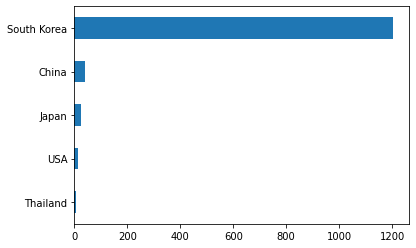

In [89]:
#First step was to grab everything in the country column and show the value_counts
#Use the sort_values to order it from biggest to lowes
#Plot by kind = 'barh' plots it horizontal bar graphs

df.country.value_counts().head(5).sort_values().plot(kind='barh')

## For **only** the idols born in China, what are the top 3 cities they were born in?

In [90]:
#First step was to create a data frame where country is China
#Then throw in birth place to bringout birth places in China.
#Then value count it know the number of times each appears in the df

df[df.country == 'China'].birthplace.value_counts().head(3)

Shanghai    3
Wuhan       2
Qingdao     2
Name: birthplace, dtype: int64

## What group has the most members in our dataset?

In [91]:
#A simple value count of group column to show which apppears most
df.group.value_counts().head()

NCT             18
14U             14
Cosmic Girls    13
Seventeen       13
The Boyz        12
Name: group, dtype: int64

## Save a CSV file of just the members of Cosmic Girls, calling it `cosmic-girls.csv`.

Count just the `Group` column.

In [118]:
#First step was to create a df where group = Cosmic Girls
#Next was to use .to_csv to save it to csv
cosmic_girls = df[df.group == 'Cosmic Girls']

In [93]:
cosmic_girls.to_csv("cosmic-girls.csv", index=False)

## How many idols are members of `Super Junior-M`?

Count both `Group` and `Other Group`.

In [94]:
df[(df.group == 'Super Junior-M') | (df.other_group == 'Super Junior-M')]

,stage_name,full_name,korean_name,k._stage_name,date_of_birth,group,country,birthplace,other_group,gender
179,Donghae,Lee Donghae,이동해,동해,1986-10-15,Super Junior,South Korea,Mokpo,Super Junior-M,M
221,Eunhyuk,Lee Hyukjae,이혁재,은혁,1986-04-04,Super Junior,South Korea,Ilsan,Super Junior-M,M
335,Henry,Henry Lau,헨리 라우,헨리,1989-10-11,Super Junior-M,Canada,Toronto,NaN,M
676,Kyuhyun,Cho Kyuhyun,조규현,규현,1988-02-03,Super Junior,South Korea,Seoul,Super Junior-M,M
876,Ryeowook,Kim Ryeowook,김려욱,려욱,1987-06-21,Super Junior,South Korea,Incheon,Super Junior-M,M
979,Siwon,Choi Siwon,최시원,시원,1986-04-07,Super Junior,South Korea,Seoul,Super Junior-M,M
1046,Sungmin,Lee Sungmin,이성민,성민,1986-01-01,Super Junior,South Korea,Gyeonggi,Super Junior-M,M
1303,Zhou Mi,Zhou Mi,조미,조미,1986-04-19,Super Junior-M,China,Wuhan,NaN,M


## Create a new column called `age` that is the age of the idol.

There are a few ways you can do this, but when calculating the age **just use the year**, you don't need to worry if they've had a birthday or not in 2021. For example, A.M. was born in 1996, so we would say she is **2021 - 1996 = 25 years old**.

In [95]:
#Using datetime function to convert date_of_birth column to datetime
df.date_of_birth = pd.to_datetime(df.date_of_birth)

In [110]:
#Next was to create an age column which was defined as 2021 - the year extracted from the datetime of birth_year

df['age'] = 2021 - df.date_of_birth.dt.year

## Who are the four youngest idols in our dataset?

In [111]:
#This require sorting values using age
df.sort_values(by='age').head(4)

,stage_name,full_name,korean_name,k._stage_name,date_of_birth,group,country,birthplace,other_group,gender,age
142,Dahyun,Jeong Dahyun,정다현,다현,2005-04-29,Rocket Punch,South Korea,NaN,NaN,F,16
1307,Zoa,Cho Hyewon,조혜원,조아,2005-05-31,Weeekly,South Korea,NaN,NaN,F,16
1213,Yeseo,Kang Yeseo,강예서,예서,2005-08-22,Busters,South Korea,NaN,NaN,F,16
332,Heesun,Park Heesun,박희선,희선,2005-01-25,Pink Fantasy,South Korea,NaN,NaN,F,16


## What is the median age of male vs female idols?

In [117]:
#Step 1, group by gender
#Step 2, find out the the median age
df.groupby(by='gender').age.median()

gender
F   25.0
M   26.0
Name: age, dtype: float64